# Introduction
This notebook purpose is to perform EDA on processed data. Using this notebook result, we will decide on which features need to be included in training models.

### Get source folder and append to sys directory

In [1]:
from __future__ import print_function
import os
import sys
PROJ_ROOT = os.path.join(os.pardir)
print(os.path.abspath(PROJ_ROOT))
src_dir = os.path.join(PROJ_ROOT, "src")
sys.path.append(src_dir)
# Data path example
#pump_data_path = os.path.join(PROJ_ROOT,
#                              "data",
#                              "raw",
#                              "pumps_train_values.csv")

/mnt/4ba37af6-51fd-47bc-8321-8c500c229114/study/School/KHOA LUAN TOT NGHIEP/runnable_program


### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np
import sklearn

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30
# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from IPython import get_ipython
ipython = get_ipython()
# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload
%autoreload 1
# Use %aimport module to reload each module
%aimport data.read_data
from data import read_data

# Visualizations
import matplotlib.pyplot as plt

# Get interim data

In [5]:
list_interim = read_data.read_indv_data(PROJ_ROOT=PROJ_ROOT,data_type="interim")

# Analysis/Modeling
First: get the data and see if data is clean
Second: start EDA

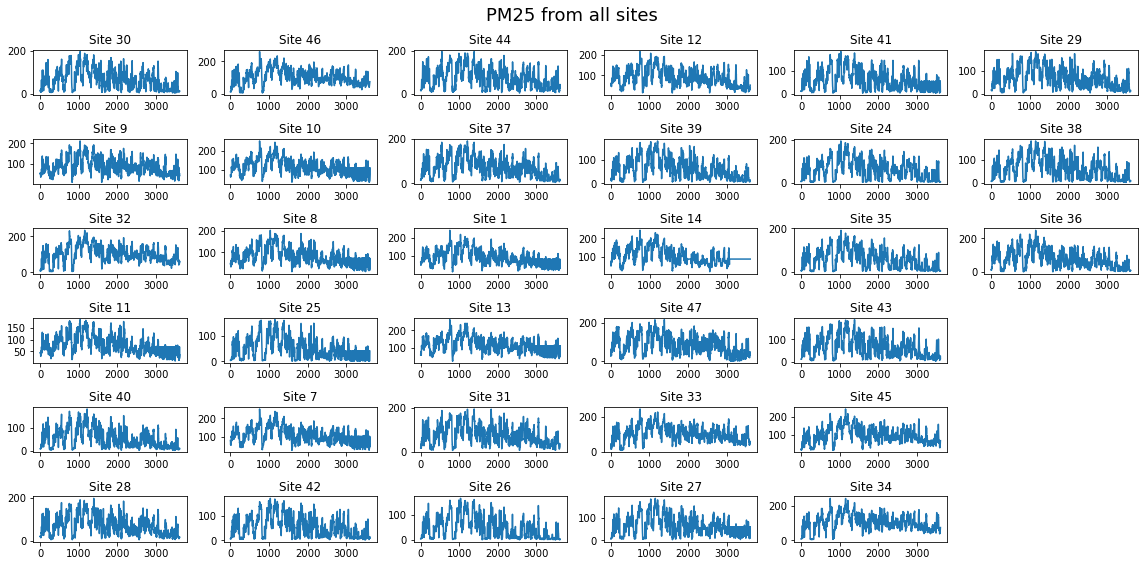

In [66]:
# Check if data is noisy by plotting everything
def plot_all_data(data_list, plot_col=None):
    """
    If col is None then doesn't have to extract data from list
    """
    fig = plt.figure(figsize=(16,9))
    # Calculate number of columns and row, setting axes and gridspec
    cols = round(np.sqrt(len(data_list)))
    gs = fig.add_gridspec(cols+1, cols)
    axes = []
    if plot_col is not None:
        for site in range(len(data_list)):
            y = site // cols
            x = site % cols
            axes.append(fig.add_subplot(gs[x,y]))
            axes[site].plot(data_list[site].loc[:, 'PM25'].values)
            axes[site].set_title("Site {}".format(data_list[site].index.get_level_values(0)[0]))
        fig.suptitle('PM25 from all sites', fontsize=18)
    if plot_col is None:
        for site in range(len(data_list)):
            y = site // cols
            x = site % cols
            axes.append(fig.add_subplot(gs[x,y]))
            axes[site].plot(data_list[site])
            # axes[site].set_title("Site {}".format(data_list[site].index.get_level_values(0)[0]))
        fig.suptitle('PM25 from all sites', fontsize=18)
    plt.tight_layout()
    plt.show()
    pass
plot_all_data(list_interim, plot_col='PM25')

We can see that not all data are in the same range, we should conform them to the same range.

## Denoising data

In [ ]:
# Data is pretty noisy so we must first denoise them
# Rolling window method should be a good start
# Now we will try rolling window method to denoise them
# Remember that denoising them but they can be transformed back.
# after denoising them we must plot the result.
# After plotting result we see which denoising is better and choose it

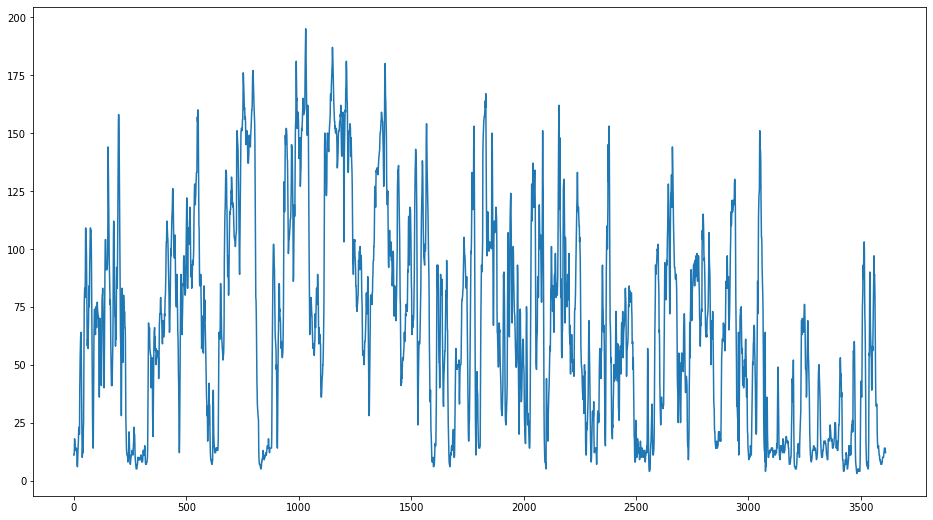

In [51]:
# this is the original data
fig = plt.figure(figsize=(16,9))
axes = fig.add_subplot()
axes.plot(list_interim[0].loc[:, 'PM25'].values)
plt.show()

Text(0.5, 1.0, 'Normal data')

Text(0.5, 1.0, 'triang method window 5')

Text(0.5, 1.0, 'hamming method window 5')

Text(0.5, 1.0, 'gaussian method window 5')

Text(0.5, 1.0, 'all instances in window is evenly weighted')

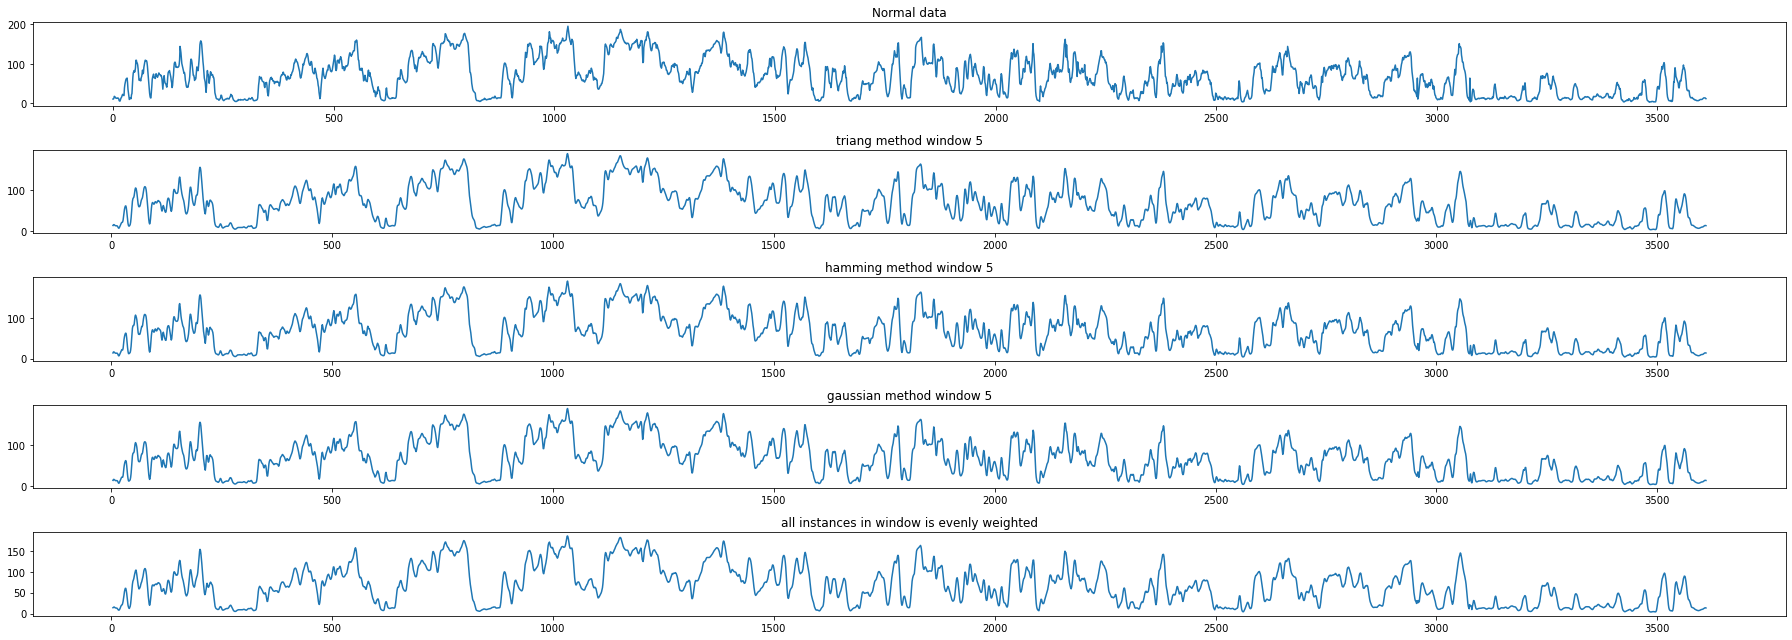

In [81]:
# Try denoising with rolling window of 5 for various window type. With rolling window of 5, there is not much difference between each type.
# But for rolling window of 24 we see some noticable different.
data = list_interim[0].loc[:, 'PM25']
rolling_methods = ['triang', 'hamming']
fig = plt.figure(figsize=(25,9))
gs = fig.add_gridspec(5,1)
axes = []
axes_index = 0
axes.append(fig.add_subplot(gs[0,0]))
axes[axes_index].plot(data.values)
axes[axes_index].set_title("Normal data")
axes_index += 1
for method in range(len(rolling_methods)):
    axes.append(fig.add_subplot(gs[axes_index,0]))
    axes[axes_index].plot(data.rolling(5, win_type=rolling_methods[method]).mean().values)
    axes[axes_index].set_title("{} method window 5".format(rolling_methods[method]))
    axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(5, win_type='gaussian').mean(std=1).values)
axes[axes_index].set_title("gaussian method window 5")
axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(5).mean().values)
axes[axes_index].set_title("all instances in window is evenly weighted")

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Normal data')

Text(0.5, 1.0, 'triang method window 24')

Text(0.5, 1.0, 'hamming method window 24')

Text(0.5, 1.0, 'gaussian method window 24')

Text(0.5, 1.0, 'all instances in window is evenly weighted')

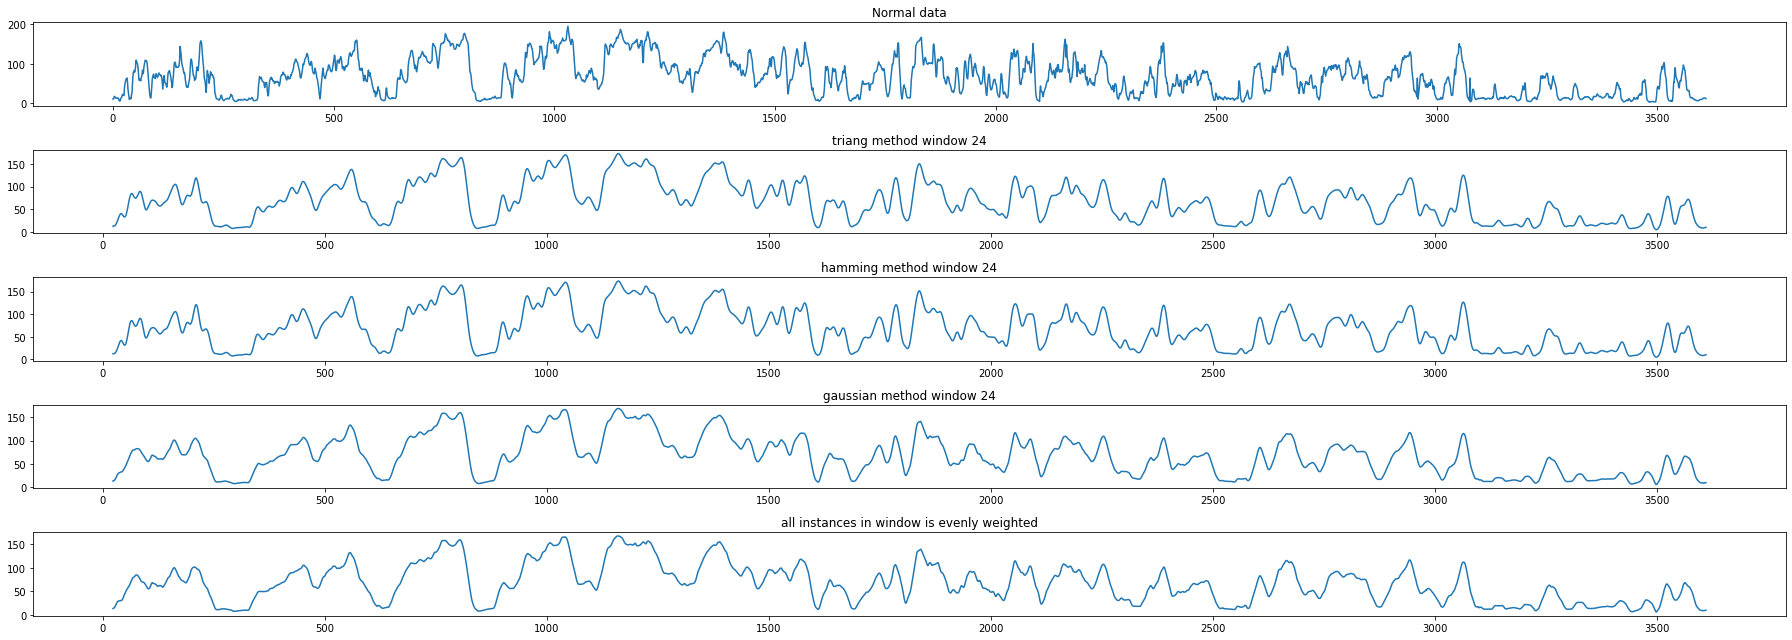

In [83]:
# But for rolling window of 24 we see some noticable different.
data = list_interim[0].loc[:, 'PM25']
rolling_methods = ['triang', 'hamming']
fig = plt.figure(figsize=(25,9))
gs = fig.add_gridspec(5,1)
axes = []
axes_index = 0
axes.append(fig.add_subplot(gs[0,0]))
axes[axes_index].plot(data.values)
axes[axes_index].set_title("Normal data")
axes_index += 1

for method in range(len(rolling_methods)):
    axes.append(fig.add_subplot(gs[axes_index,0]))
    axes[axes_index].plot(data.rolling(24, win_type=rolling_methods[method]).mean().values)
    axes[axes_index].set_title("{} method window 24".format(rolling_methods[method]))
    axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(24, win_type='gaussian').mean(std=12).values)
axes[axes_index].set_title("gaussian method window 24")
axes_index += 1

axes.append(fig.add_subplot(gs[axes_index,0]))
axes[axes_index].plot(data.rolling(24).mean().values)
axes[axes_index].set_title("all instances in window is evenly weighted")

plt.tight_layout()
plt.show()

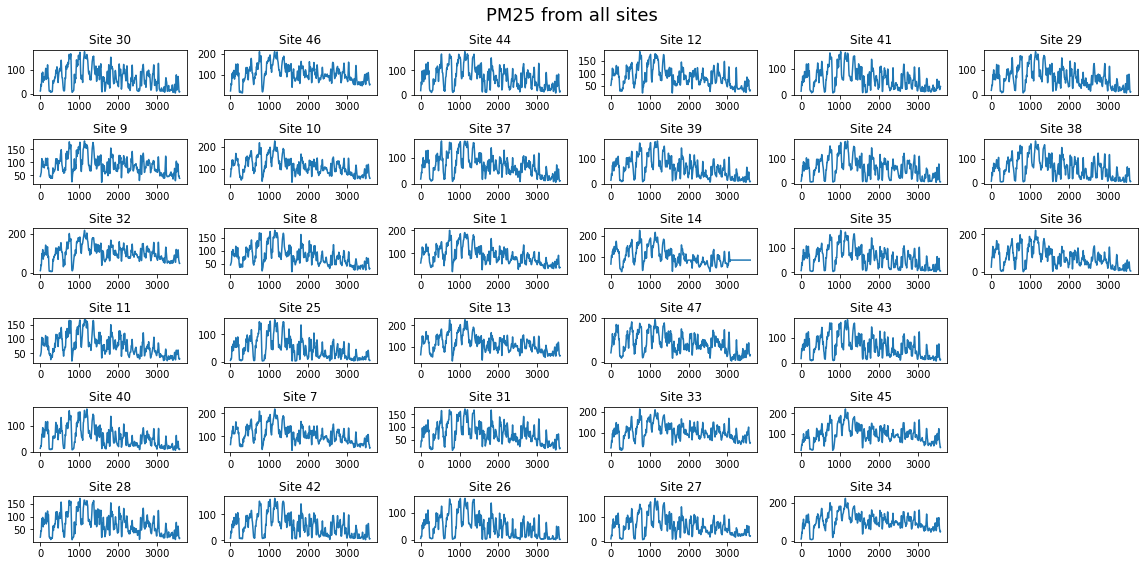

In [93]:
# Change all PM25 data with triang method denoising and window size is 24
denoised_data = []
for i in range(len(list_interim)):
    data = list_interim[i].loc[:, ['PM25']]
    denoised_data.append(data.rolling(24, win_type='triang').mean().dropna())
plot_all_data(denoised_data, plot_col='PM25')

## Plot data and get critical features

In [ ]:
# Let's see what features we need?
# Is there any trends for AQI in a day, week, month, quarter, years?
# To see trends in a day, we must plot each hour average AQI for every day in a month for 12 months.
# To see trends in a week, we must plot AQI of week after downcasting from hour to day. Plot them for 3 months
# To see trends in a month, we must plot AQI of 12 months. Now we do not have it yet.
# Year and quarter is also where we doesn't have enough data yet.
# How much difference are there in these trends? Put them in percentage.
# Are there any trends for different stations?
# Use time series clustering to cluster stations after denoising.
# Just to be sure, plot the amount of each AQI category for each stations in a month time for 3 months. After that we can be sure that each station is differetn.
# How much difference are there in stations? Put them in percentage

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 1')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 2')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 3')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 4')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 5')

<BarContainer object of 24 artists>

Text(0.5, 1.0, 'Month 12')

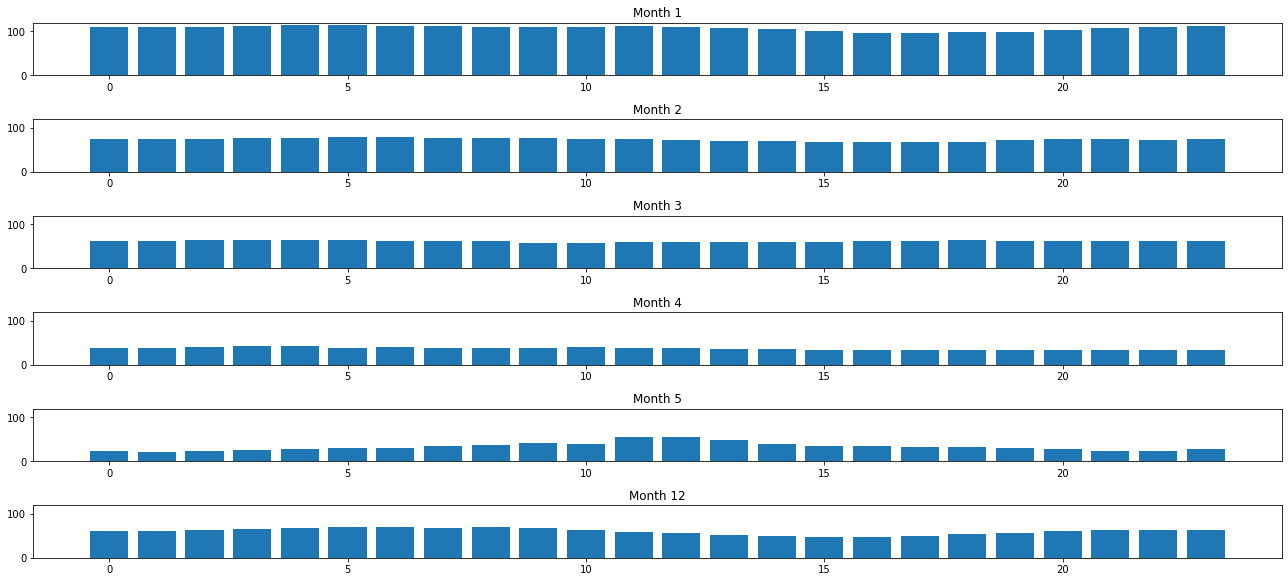

In [134]:
# to see trends in a day
# first: get hourly average of everyday in a month. groupby hour and mean
# second: do that for every months
# third: do that for every sites
sample_data = list_interim[0].loc[:, ['PM25']]

sample_data['month'] = sample_data.index.get_level_values(1).month
sample_data['hour'] = sample_data.index.get_level_values(1).hour
groupby_data = sample_data.groupby(['month', 'hour'])['PM25'].mean()
fig = plt.figure(figsize=(18,16))
gs = fig.add_gridspec(12, 1)
axes = []
axes_index = 0
for month in groupby_data.index.get_level_values(0).unique():
    plot_data = groupby_data[groupby_data.index.get_level_values(0)==month].reset_index()

    # plotting parameter
    if axes_index != 0:
        axes.append(fig.add_subplot(gs[axes_index, 0], sharey=axes[0]))
    else:
        axes.append(fig.add_subplot(gs[axes_index, 0]))
    axes[axes_index].bar(x=plot_data.loc[:, 'hour'].values, height=plot_data.loc[:, 'PM25'].values)
    axes[axes_index].set_title("Month {}".format(month))
    axes_index += 1
plt.tight_layout()
plt.show()

We can see that 

In [117]:
len(groupby_data[groupby_data.index.get_level_values(0)==1].reset_index().loc[:, 'PM25'].values)

24

In [116]:
len(groupby_data[groupby_data.index.get_level_values(0)==1].reset_index().loc[:, 'hour'].values)

24

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here